In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [11]:
df = pd.read_csv('D:\WEBDEV\HackRx\LOAN_DATA.csv')

In [12]:
df.head()

,S_NO,NAME,AGE,GENDER,RELATIONSHIP_STATUS,PID1,PID2,PID3,PIDB
0,1,Saket Misra,22,M,U,STL,PIL,PIL,STL
1,2,Ranjan dehuri,34,M,M,HEI,VEL,HEI,HEI
2,3,Bivas Kesar,30,M,U,HEI,HEI,HEI,NaN
3,4,Rani Das,23,F,M,HEI,COL,HEI,HEI
4,5,Neha Das,42,F,M,HEI,EDT,EDT,EDT


In [13]:
df.shape

(200, 9)

In [14]:
df = df[['AGE','GENDER','RELATIONSHIP_STATUS']]

In [15]:
df.shape

(200, 3)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  200 non-null    int64 
 1   GENDER               200 non-null    object
 2   RELATIONSHIP_STATUS  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [17]:
df = pd.get_dummies(df,columns=['RELATIONSHIP_STATUS'])
df.shape

(200, 4)

In [18]:
df.describe()

,AGE,RELATIONSHIP_STATUS_M,RELATIONSHIP_STATUS_U
count,200.000000,200.000000,200.000000
mean,41.265000,0.715000,0.285000
std,15.940996,0.452547,0.452547
min,18.000000,0.000000,0.000000
25%,28.750000,0.000000,0.000000
50%,39.000000,1.000000,0.000000
75%,51.000000,1.000000,1.000000
max,99.000000,1.000000,1.000000


In [23]:
df.drop[['RELATIONSHIP_STATUS_U'],axis=1]

SyntaxError: invalid syntax (<ipython-input-23-1b44917c1ddd>, line 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    200 non-null    int64 
 1   GENDER                 200 non-null    object
 2   RELATIONSHIP_STATUS_M  200 non-null    uint8 
 3   RELATIONSHIP_STATUS_U  200 non-null    uint8 
dtypes: int64(1), object(1), uint8(2)
memory usage: 3.6+ KB


In [29]:
df = df.drop(columns='RELATIONSHIP_STATUS_U')

In [27]:
df = pd.get_dummies(df,columns=['GENDER'])

In [28]:
df.drop('GENDER_F',axis=1)

,AGE,RELATIONSHIP_STATUS_M,RELATIONSHIP_STATUS_U,GENDER_M
0,22,0,1,1
1,34,1,0,1
2,30,0,1,1
3,23,1,0,0
4,42,1,0,0
...,...,...,...,...
195,75,1,0,0
196,24,1,0,1
197,72,1,0,1
198,68,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    200 non-null    int64
 1   RELATIONSHIP_STATUS_M  200 non-null    uint8
 2   GENDER_F               200 non-null    uint8
 3   GENDER_M               200 non-null    uint8
dtypes: int64(1), uint8(3)
memory usage: 2.3 KB


In [32]:
df = df.drop('GENDER_F',axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    200 non-null    int64
 1   RELATIONSHIP_STATUS_M  200 non-null    uint8
 2   GENDER_M               200 non-null    uint8
dtypes: int64(1), uint8(2)
memory usage: 2.1 KB


In [35]:
inputc = [column for column in df.columns if column!='RELATIONSHIP_STATUS_M']
output = 'RELATIONSHIP_STATUS_M'
print(inputc)
print(output)

['AGE', 'GENDER_M']
RELATIONSHIP_STATUS_M


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    200 non-null    int64
 1   RELATIONSHIP_STATUS_M  200 non-null    uint8
 2   GENDER_M               200 non-null    uint8
dtypes: int64(1), uint8(2)
memory usage: 2.1 KB


In [38]:
x=df.loc[:,inputc].values
y=df.loc[:,output].values
type(x)

numpy.ndarray

In [39]:
print(x.shape,y.shape)

(200, 2) (200,)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
x_t,x_te,y_t,y_te = train_test_split(x,y,test_size = 0.4,random_state = 100,stratify = y)

In [42]:
y_t.value_counts()
y_te.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [43]:
x_t.shape

(120, 2)

In [45]:
np.sum(y_t)

86

In [46]:
np.sum(x_t)

4933

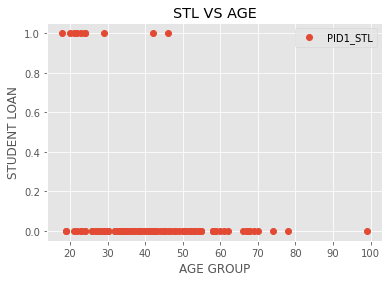

In [11]:
df.plot(x='AGE',y = 'PID1_STL',style='o')
plt.title('STL VS AGE')
plt.xlabel('AGE GROUP')
plt.ylabel('STUDENT LOAN')
plt.show()

In [47]:
lg = LogisticRegression().fit(x_t,y_t)

In [48]:
y_tp = lg.predict(x_t)
y_tep = lg.predict(x_te)

In [57]:
AGE = 34
GENDER_M = 1
t = np.array(['AGE','GENDER_M'])
print(t)
t=t.reshape(-1,1)
print(t)

['AGE' 'GENDER_M']
[['AGE']
 ['GENDER_M']]


In [58]:
metrics.accuracy_score(y_t,y_tp)

0.8916666666666667

In [59]:
metrics.accuracy_score(y_te,y_tep)

0.8875

In [60]:
metrics.roc_auc_score(y_t,y_tp)

0.8621751025991793

In [61]:
tc = metrics.confusion_matrix(y_t,y_tp)

In [62]:
print(tc)

[[27  7]
 [ 6 80]]


In [63]:
lg.predict(x_te)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=uint8)

In [64]:
x_te.shape

(80, 2)

In [65]:
print(x_te)

[[41  1]
 [38  1]
 [49  0]
 [19  0]
 [52  1]
 [44  1]
 [68  0]
 [30  1]
 [43  1]
 [43  1]
 [21  1]
 [40  1]
 [32  1]
 [30  1]
 [60  1]
 [24  0]
 [28  1]
 [50  1]
 [54  1]
 [36  0]
 [60  1]
 [20  1]
 [45  0]
 [45  0]
 [53  1]
 [55  1]
 [21  1]
 [65  0]
 [35  1]
 [56  0]
 [28  0]
 [42  1]
 [22  1]
 [58  1]
 [42  0]
 [45  1]
 [34  1]
 [61  1]
 [42  1]
 [62  1]
 [19  0]
 [29  0]
 [58  1]
 [37  1]
 [25  1]
 [22  1]
 [24  1]
 [61  1]
 [19  1]
 [39  1]
 [48  1]
 [19  0]
 [72  1]
 [23  1]
 [45  0]
 [46  1]
 [34  1]
 [40  1]
 [33  0]
 [74  0]
 [67  1]
 [21  0]
 [18  1]
 [69  1]
 [99  1]
 [49  1]
 [34  1]
 [47  1]
 [34  1]
 [58  0]
 [48  1]
 [31  0]
 [70  1]
 [50  1]
 [56  1]
 [30  0]
 [26  1]
 [53  0]
 [42  1]
 [25  1]]


In [85]:
l = np.array([[14,1]])
print(l)

[[14  1]]


In [83]:
l.reshape(-1,1)

array([[14],
       [ 1]])

In [84]:
lg.predict(l)

array([0], dtype=uint8)

In [86]:
lg.predict([[24,1]])

array([0], dtype=uint8)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    200 non-null    int64
 1   RELATIONSHIP_STATUS_M  200 non-null    uint8
 2   GENDER_M               200 non-null    uint8
dtypes: int64(1), uint8(2)
memory usage: 2.1 KB


In [91]:
lg.predict([[28,0]])

array([0], dtype=uint8)